In [1]:
import glob
import os as os
import re as re
import pandas as pd
import matplotlib as mpl
import seaborn as sns

%reload_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rc('text', usetex=True)
cmap = sns.color_palette("Paired", 10)

In [2]:
from motors.plot import *
from motors.aesthetics import *
prepare_plot()

# Pick an example angle

In [3]:
this = Simulation(data_source='adk_md_data')
this.name='chi2THR175'
this.cSubstrate=10**-3  # Substrate concentration (M)
this.simulate(directory='./md-data/adenylate-kinase/')

# (a)

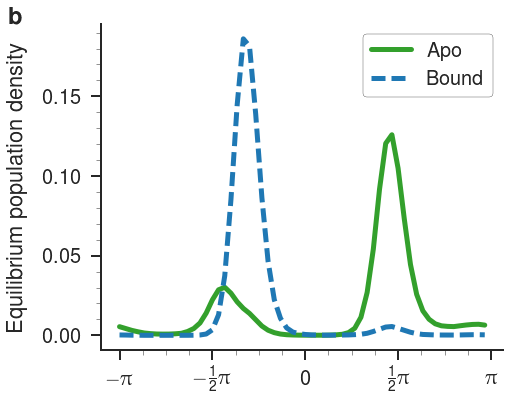

In [4]:
plot_input(this)

ax = plt.gca()
names=['Apo', 'Bound']
ax.legend(names, frameon=True, loc='upper right', edgecolor='k', framealpha=1.0)
ax.set_ylabel('Equilibrium population density')
ax.set_xlabel('')
panel_label('b', panel_xoffset=-0.23, panel_yoffset=1.0)

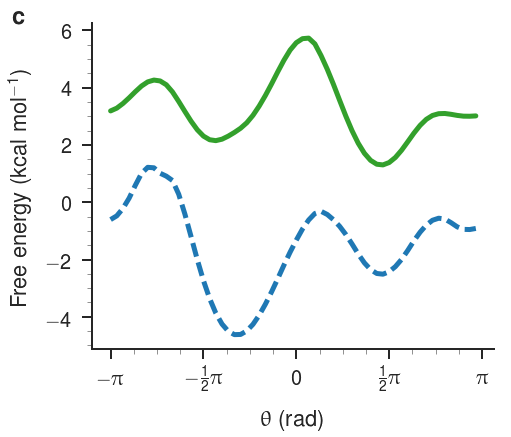

In [7]:
plot_energy(this)

ax = plt.gca()
ax.set_ylabel('Free energy (kcal mol$^{{-1}}$)')
panel_label('c', panel_xoffset=-0.2, panel_yoffset=1.0)

C                         +1.00e+06  second**-1
D                         +3.00e+12  degrees**2 second**-1
k_{cat}                   +3.12e+02  second**-1
[S]                       +1.00e-03  M         
dt                        +1.00e-12  second    
-------------------------
Intrasurface flux         -1.35e+02  cycle second**-1
Peak                      +2.46e+01  cycle second**-1


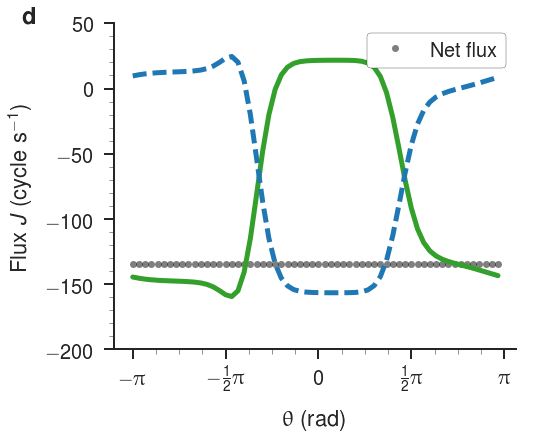

In [8]:
plot_flux(this)

ax = plt.gca()
# names=['Apo', 'Bound']
# ax.legend(names, frameon=True, loc='upper right', edgecolor='k', framealpha=1.0)
# ax.set_ylabel('Free energy (kcal mol$^{{-1}}$)')
ax.set_ylim([-200, 50])
panel_label('d', panel_xoffset=-0.23, panel_yoffset=1.0)

# Find an example of large *reciprocating* flux and minimal *directional* flux

In [11]:
directory = './precomputed-pickles/'
adk_312 = pd.read_pickle(directory + 'adk-concentration-scan.pickle')

In [12]:
# Let's look at a single concentration, 10**-3.0 M
adk_312 = return_concentration_slice(adk_312, -3.0)

In [13]:
adk_312[ (adk_312['Directional flux'].abs() < 1) & (adk_312['Driven flux'].abs() > 100)].head(10)

,Concentration,Directional flux,Driven flux,File,Intersurface flux,Max load,Max power,ResID
27109,-3.0,0.456940,126.127221,chi1ARG119,32.090874,0.00002,3.278243e-06,119
27188,-3.0,-0.012787,129.888784,chi1LEU115,33.475579,-0.00025,2.646948e-06,115
27191,-3.0,-0.000542,133.813182,chi1LEU178,34.487998,-0.00002,2.276898e-08,178
27196,-3.0,-0.007017,217.067356,chi1LEU5,54.244898,-0.00008,6.418300e-07,5
27198,-3.0,-0.104681,116.175393,chi1LEU6,23.531686,-0.00028,1.404720e-05,6
27200,-3.0,-0.034575,105.126952,chi1LEU67,20.215250,-0.00018,3.318320e-06,67
27227,-3.0,-0.939927,222.307389,chi1PHE109,56.236982,-0.07409,4.367661e-02,109
27255,-3.0,-0.359494,163.018611,chi1THR31,40.444725,-0.00169,3.100395e-04,31
27263,-3.0,-0.028414,118.045985,chi1TYR193,30.633718,-0.00890,1.367603e-04,193
27298,-3.0,0.673546,131.552738,chi2ASN138,25.599063,0.00000,0.000000e+00,138


In [14]:
this = Simulation(data_source='adk_md_data')
this.name='chi2ASN138'
this.cSubstrate=10**-3 # Substrate concentration (M)
this.simulate(directory='./md-data/adenylate-kinase/')

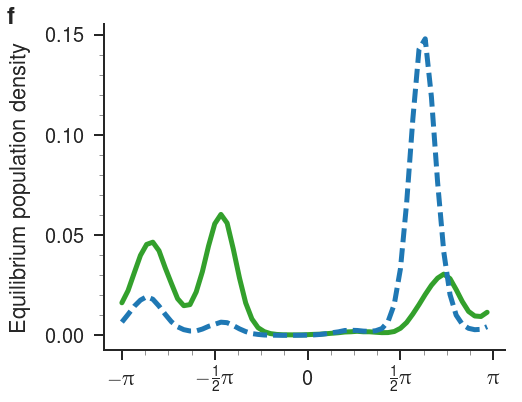

In [15]:
plot_input(this)

ax = plt.gca()
names=['Apo', 'Bound']
# ax.legend(names, frameon=True, loc='upper right', edgecolor='k', framealpha=1.0)
ax.set_ylabel('Equilibrium population density')
ax.set_xlabel('')
ax.set_yticks([0.00, 0.05, 0.10, 0.15])
panel_label('f', panel_xoffset=-0.24, panel_yoffset=1.0)

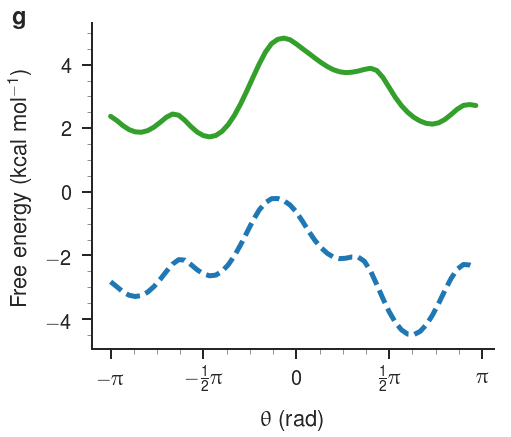

In [16]:
plot_energy(this)

ax = plt.gca()
ax.set_ylabel('Free energy (kcal mol$^{{-1}}$)')
panel_label('g', panel_xoffset=-0.2, panel_yoffset=1.0)

C                         +1.00e+06  second**-1
D                         +3.00e+12  degrees**2 second**-1
k_{cat}                   +3.12e+02  second**-1
[S]                       +1.00e-03  M         
dt                        +1.00e-12  second    
-------------------------
Intrasurface flux         +6.73e-01  cycle second**-1
Peak                      +1.32e+02  cycle second**-1


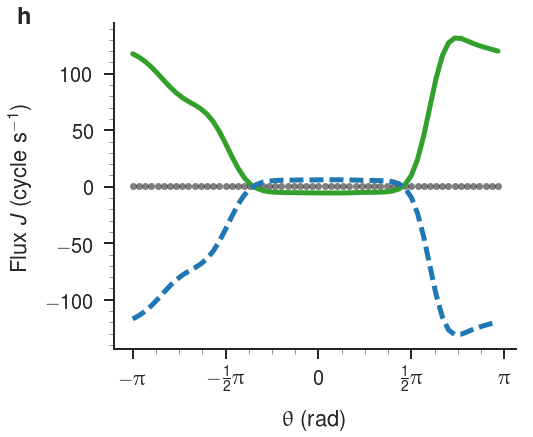

In [17]:
plot_flux(this)

ax = plt.gca()
ax.legend('', frameon=False)
panel_label('h', panel_xoffset=-0.24, panel_yoffset=1.0)